# Final Project
## Elizabeth Earl 
## DSC630-T301

In [4]:
import pandas as pd
df = pd.read_csv('disneyRevenue18_21Qtr.csv')
df.head()

,QTR,Revenue,Cost of goods sold,Gross profit,"Gross profit Margin, %",General and administrative expense,Operating expense total,Depreciation and amortization,Interest expense,Pre tax profit,Income tax expense,Net Income
0,"Q1, 2018",15.4,8.7,6.6,43%,2.1,2.8,742.0m,129.0m,3.7,(728.0m),4.5
1,"Q2, 2018",14.5,7.5,7.0,48%,2.2,3.0,731.0m,143.0m,3.9,813.0m,3.1
2,"Q3, 2018",15.2,8.3,6.9,45%,2.2,3.0,744.0m,143.0m,3.9,795.0m,3.1
3,"Q1, 2019",15.3,9.0,6.3,41%,2.2,2.9,732.0m,63.0m,3.4,645.0m,2.8
4,"Q2, 2019",14.9,8.4,6.5,44%,2.3,3.2,828.0m,143.0m,7.2,1.6,5.6


In [3]:
df.shape
#df.describe
dfSubset = df

In [33]:
dfSubset = df.sample(n=2000, random_state=2)
dfSubset.to_csv('destinationSubset2000.csv')

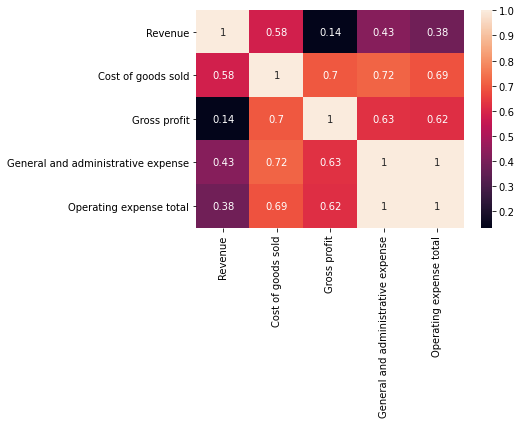

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [8]:
train_sub =  pd.read_csv('disneyRevenue18_21Qtr.csv') #load data
train_sub.shape

(11, 13)

In [9]:
train_sub.head()

,Unnamed: 0,Unnamed: 1,Revenue,Cost of goods sold,Gross profit,"Gross profit Margin, %",General and administrative expense,Operating expense total,Depreciation and amortization,Interest expense,Pre tax profit,Income tax expense,Net Income
0,0,"Q1, 2018",15.4,8.7,6.6,43%,2.1,2.8,742.0m,129.0m,3.7,(728.0m),4.5
1,1,"Q2, 2018",14.5,7.5,7.0,48%,2.2,3.0,731.0m,143.0m,3.9,813.0m,3.1
2,2,"Q3, 2018",15.2,8.3,6.9,45%,2.2,3.0,744.0m,143.0m,3.9,795.0m,3.1
3,3,"Q1, 2019",15.3,9.0,6.3,41%,2.2,2.9,732.0m,63.0m,3.4,645.0m,2.8
4,4,"Q2, 2019",14.9,8.4,6.5,44%,2.3,3.2,828.0m,143.0m,7.2,1.6,5.6


In [5]:
df.dtypes

QTR                                    object
Revenue                               float64
Cost of goods sold                    float64
Gross profit                          float64
Gross profit Margin, %                 object
General and administrative expense    float64
Operating expense total               float64
Depreciation and amortization          object
Interest expense                       object
Pre tax profit                         object
Income tax expense                     object
Net Income                             object
dtype: object

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('Revenue',axis=1)
y = df['Revenue']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5)

In [8]:
import numpy as np
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [23]:
obs=df['Revenue'].value_counts()
per=df['Revenue'].value_counts(normalize = True) *100
dfc = pd.concat([obs.rename("count"), per.rename("%")], axis=1)
dfc['%'] = dfc['%'].round(2)
dfc.index.name = 'Revenue'
print(dfc)
print('Revenue mean: ', df['Revenue'].mean())

         count      %
Revenue              
14.5         2  18.18
16.2         2  18.18
11.2         1   9.09
14.9         1   9.09
15.4         1   9.09
15.3         1   9.09
20.2         1   9.09
15.2         1   9.09
20.9         1   9.09
Revenue mean:  15.863636363636362


In [19]:
df['Revenue'].mean()

15.863636363636362

In [15]:
df = df.select_dtypes(exclude=['object'])
df = df.fillna(df.mean())
X = df.drop('Revenue',axis=1)
y = df['Revenue']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5)



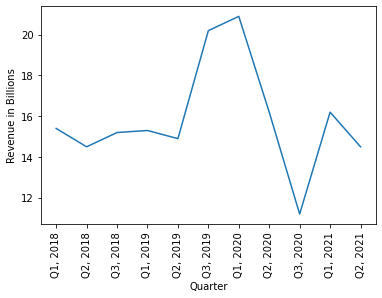

In [6]:
import matplotlib.pyplot as plt
plt.plot(df['QTR'], df['Revenue'])
plt.xlabel("Quarter") 
plt.xticks(rotation=90)
plt.ylabel("Revenue in Billions") 
plt.show()

<hr>

https://www.kaggle.com/arushchillar/disneyland-reviews?select=DisneylandReviews.csv

In [35]:
reviews = pd.read_csv('DisneylandReviews.csv', encoding='latin-1')
reviews.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [36]:
date = reviews.Year_Month.str.split('-', n = 1, expand = True)
reviews['Year'] = date[0]
reviews['Month'] = date[1]
reviews = reviews[reviews.Year != 'missing']
reviews['Date'] = reviews.Month.astype(str) + '-' + reviews.Year.astype(str)
reviews.Date = pd.to_datetime(reviews.Date)
reviews.drop(['Year_Month', 'Month'], axis=1, inplace=True)
#reviews.drop(['Year_Month', 'Year', 'Month'], axis=1, inplace=True)

In [18]:
reviews.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Date
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019-04-01
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019-05-01
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019-04-01
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019-04-01
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019-04-01


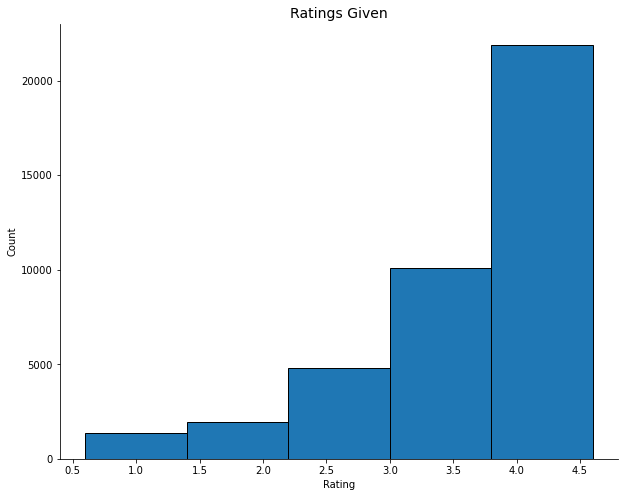

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
reviews = reviews.drop_duplicates()
plt.figure(figsize=(10,8))
plt.hist(reviews.Rating, align='left', bins=5, edgecolor='k')
sns.despine()
plt.title('Ratings Given', fontsize=14)
plt.xlabel('Rating'), plt.ylabel('Count')
plt.show()

In [21]:
from textblob import TextBlob
def polar(x):
    return TextBlob(x).sentiment.polarity
reviews['Sentiment'] = reviews.Review_Text.apply(polar)

In [22]:
#reviews = reviews.sort_values(by= ['Sentiment'], ascending=False)
reviews.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Date,Sentiment
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019-04-01,0.243981
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019-05-01,0.236131
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019-04-01,0.160498
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019-04-01,0.189286
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019-04-01,0.266667


In [24]:
import string
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
def text_clean(Review_Text):
    nopunc = [i for i in Review_Text if i not in string.punctuation]
    nopunc_text = ''.join(nopunc)
    return [i for i in nopunc_text.split() if i.lower() not in stopwords.words('english')]
X = reviews.head(1000).Review_Text
y = reviews.head(1000).Rating

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)
lRegression = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_clean)),
    ('classifier', LogisticRegression(solver='newton-cg', multi_class='multinomial'))
])
lRegression.fit(X_train, y_train)
print(classification_report(y_test,(lRegression.predict(X_test))))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        11
           3       1.00      0.03      0.05        37
           4       0.55      0.17      0.25       103
           5       0.51      0.95      0.66       143

    accuracy                           0.51       300
   macro avg       0.41      0.23      0.19       300
weighted avg       0.55      0.51      0.41       300



C:\Users\Eearl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eearl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eearl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
multinomial = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_clean)),
    ('classifier', MultinomialNB())
])
multinomial.fit(X_train, y_train)
print(classification_report(y_test, (multinomial.predict(X_test))))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        68
           4       0.00      0.00      0.00       158
           5       0.50      1.00      0.67       251

    accuracy                           0.50       500
   macro avg       0.10      0.20      0.13       500
weighted avg       0.25      0.50      0.34       500



C:\Users\Eearl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eearl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eearl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from sklearn.tree import DecisionTreeClassifier
dTree = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_clean)),
    ('classifier', DecisionTreeClassifier())
])
dTree.fit(X_train, y_train)
print(classification_report(y_test, ( dTree.predict(X_test))))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.07      0.05      0.06        19
           3       0.27      0.26      0.27        68
           4       0.34      0.32      0.33       158
           5       0.61      0.64      0.62       251

    accuracy                           0.46       500
   macro avg       0.26      0.26      0.26       500
weighted avg       0.45      0.46      0.46       500



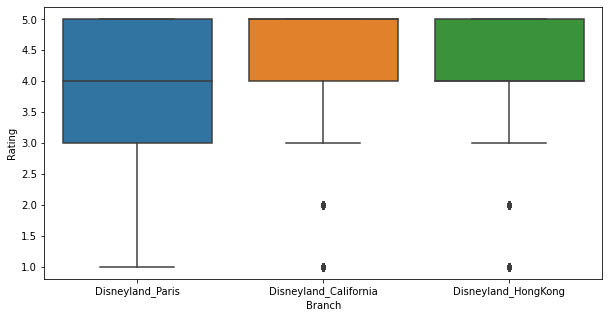

In [308]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Branch", y="Rating", data=reviews);

In [316]:
import pandas as pd
features = reviews['Review_Text'].values
removals = []
for sentence in range(0, len(features)):
    removal = re.sub('(https?://\S+)', '', str(features[sentence]))
    removal = re.sub(r'\W', ' ', removal)
    removal = re.sub(r'\s+[a-zA-Z]\s+', ' ', removal)
    removal = re.sub(r'\^[a-zA-Z]\s+', ' ', removal) 
    removal = re.sub(r'\s+', ' ', removal, flags=re.I)
    removal = re.sub(r'^b\s+', '', removal)
    removal = removal.lower()
    removals.append(removal)
temp=pd.DataFrame()
temp['reviews'] = removals

In [317]:
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity
temp['Polarity'] = temp['reviews'].apply(getPolarity)
temp.head()

,reviews,Polarity
0,what can we say about disneyland it so beautif...,0.85
1,the happiest place on earth the happiest place...,0.00
2,the happiest place on earth they treated my so...,1.00
3,perfect for everyone and that lil kidd in all ...,1.00
4,everything was excellent with exception of the...,1.00


In [318]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
temp['Analysis'] = temp['Polarity'].apply(getAnalysis)
temp.head()

,reviews,Polarity,Analysis
0,what can we say about disneyland it so beautif...,0.85,Positive
1,the happiest place on earth the happiest place...,0.00,Neutral
2,the happiest place on earth they treated my so...,1.00,Positive
3,perfect for everyone and that lil kidd in all ...,1.00,Positive
4,everything was excellent with exception of the...,1.00,Positive


In [323]:
import numpy as np
reviews['sentiment']=temp['Analysis']
reviews['Sentiment']=reviews['Rating'].apply(lambda x:'Negative' if x<3 else np.nan)
reviews['Sentiment']=reviews['Sentiment'].fillna(reviews['sentiment'])
reviews['Review_Text'] = temp['reviews']
reviews=reviews.drop(['sentiment', 'Review_ID'],axis=1)
reviews.head()

,Rating,Reviewer_Location,Review_Text,Branch,Date,Sentiment
0,4,Australia,what can we say about disneyland it so beautif...,Disneyland_HongKong,2019-04-01,Positive
1,4,Philippines,the happiest place on earth the happiest place...,Disneyland_HongKong,2019-05-01,Neutral
2,4,United Arab Emirates,the happiest place on earth they treated my so...,Disneyland_HongKong,2019-04-01,Positive
3,4,Australia,perfect for everyone and that lil kidd in all ...,Disneyland_HongKong,2019-04-01,Positive
4,4,United Kingdom,everything was excellent with exception of the...,Disneyland_HongKong,2019-04-01,Positive


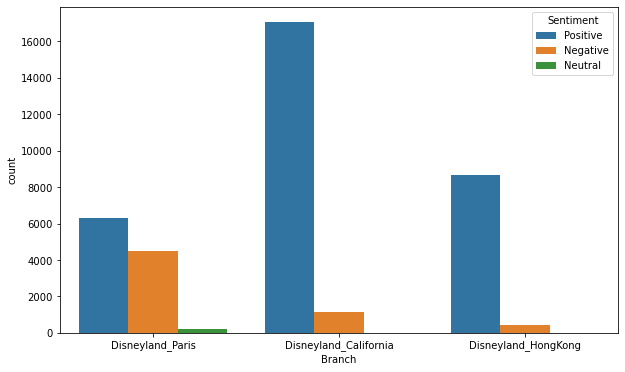

In [314]:
plt.figure(figsize=(10,6))
sns.countplot(data=reviews,x='Branch',hue='Sentiment');

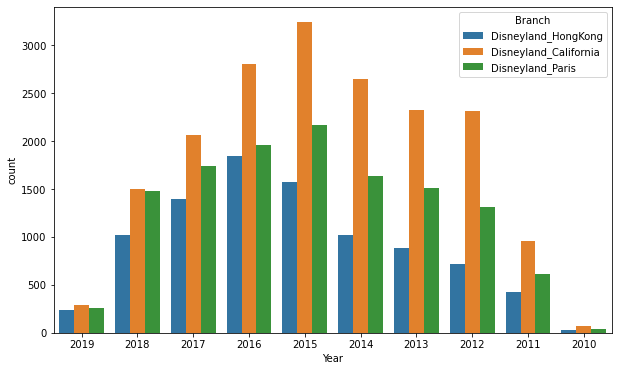

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(data=reviews,x='Year',hue='Branch');

In [31]:
included =reviews
included['check']=reviews['Review_Text'].apply(lambda word:word.count('sick'))
included=included.loc[annualP['check']>0]
included.shape

(161, 8)

In [335]:
reviews.shape

(40031, 7)

In [40]:
dPlus = pd.read_csv('disney_plus_titles.csv', encoding='latin-1')
dPlus.head()

FileNotFoundError: [Errno 2] No such file or directory: 'disney_plus_titles.csv'

<hr>